In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

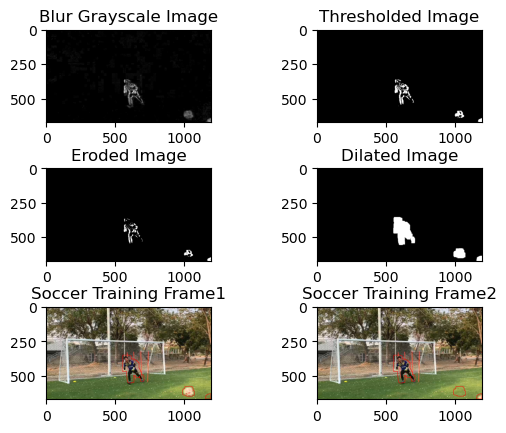

In [3]:
frame1 = cv2.imread(r'C:\Users\ffah\Desktop\Projects\BEng Project\SIIT ML\Robotics Lecture\Robotics_code\week5\Figures\SoccerTrainFrame1.png')
frame2 = cv2.imread(r'C:\Users\ffah\Desktop\Projects\BEng Project\SIIT ML\Robotics Lecture\Robotics_code\week5\Figures\SoccerTrainFrame2.png')

#Find absolut difference
diff = cv2.absdiff(frame1, frame2)
gray_img = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray_img, (5,5) , 0)
_, thresh = cv2.threshold(blur_img, 60, 255, cv2.THRESH_BINARY)

plt.subplot(321), plt.imshow(blur_img,cmap = 'gray'), plt.title("Blur Grayscale Image")
plt.subplot(322), plt.imshow(thresh,cmap = 'gray'), plt.title("Thresholded Image")

#Make Erosion and Dilation
ErodeImg = cv2.erode(thresh, None, iterations=1)
DilateImg = cv2.dilate(ErodeImg, None, iterations=11) 

plt.subplot(323), plt.imshow(ErodeImg,cmap = 'gray'), plt.title("Eroded Image")
plt.subplot(324), plt.imshow(DilateImg,cmap = 'gray'), plt.title("Dilated Image")

#Draw Contour
contours, _ = cv2.findContours(DilateImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(frame1, contours, -1, (0,0,255), 2)
cv2.drawContours(frame2, contours, -1, (0,0,255), 2)

#Change BGR to RGB
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

plt.subplot(325), plt.imshow(frame1), plt.title("Soccer Training Frame1")
plt.subplot(326), plt.imshow(frame2), plt.title("Soccer Training Frame2")

# Add gap between upper and lower images
plt.subplots_adjust(hspace=0.5)

plt.show()